In [1]:
dataset=[
    ['아메리카노','카페라떼'],
    ['카페라떼','아메리카노','카푸치노'],
    ['바닐라라떼','아메리카노'],
    ['녹차라떼','카페라떼','아메리카노'],
    ['카페모카','아메리카노'],
    ['아메리카노','카페라떼'],
    ['초콜릿','아메리카노'],
    ['아메리카노'],
    ['카페모카','카페라떼']
]

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_result=te.fit(dataset).transform(dataset)
print(te_result)
df=pd.DataFrame(te_result, columns=te.columns_) # 데이터프레임으로 변환
print(df)

[[False False  True False  True False False]
 [False False  True False  True False  True]
 [False  True  True False False False False]
 [ True False  True False  True False False]
 [False False  True False False  True False]
 [False False  True False  True False False]
 [False False  True  True False False False]
 [False False  True False False False False]
 [False False False False  True  True False]]
    녹차라떼  바닐라라떼  아메리카노    초콜릿   카페라떼   카페모카   카푸치노
0  False  False   True  False   True  False  False
1  False  False   True  False   True  False   True
2  False   True   True  False  False  False  False
3   True  False   True  False   True  False  False
4  False  False   True  False  False   True  False
5  False  False   True  False   True  False  False
6  False  False   True   True  False  False  False
7  False  False   True  False  False  False  False
8  False  False  False  False   True   True  False


In [3]:
from mlxtend.frequent_patterns import apriori

itemset=apriori(df, use_colnames=True)
itemset
# 아메리카노를 살 확률 0.89
# 카페라떼를 살 확률 0.56

,support,itemsets
0,0.888889,(아메리카노)
1,0.555556,(카페라떼)


In [4]:
itemset=apriori(df, min_support=0.1 ,use_colnames=True) # support 기본값 0.5
itemset

,support,itemsets
0,0.111111,(녹차라떼)
1,0.111111,(바닐라라떼)
2,0.888889,(아메리카노)
3,0.111111,(초콜릿)
4,0.555556,(카페라떼)
5,0.222222,(카페모카)
6,0.111111,(카푸치노)
7,0.111111,"(아메리카노, 녹차라떼)"
8,0.111111,"(카페라떼, 녹차라떼)"
9,0.111111,"(아메리카노, 바닐라라떼)"


In [5]:
from mlxtend.frequent_patterns import association_rules

rules=association_rules(itemset, metric="confidence", min_threshold=0.6) # confidence 기본값 0.8
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(녹차라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
1,(녹차라떼),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
2,(바닐라라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
3,(초콜릿),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
4,(카페라떼),(아메리카노),0.555556,0.888889,0.444444,0.8,0.900,-0.049383,0.555556
5,(카푸치노),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
6,(카푸치노),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
7,"(아메리카노, 녹차라떼)",(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
8,"(카페라떼, 녹차라떼)",(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
9,(녹차라떼),"(카페라떼, 아메리카노)",0.111111,0.444444,0.111111,1.0,2.250,0.061728,inf


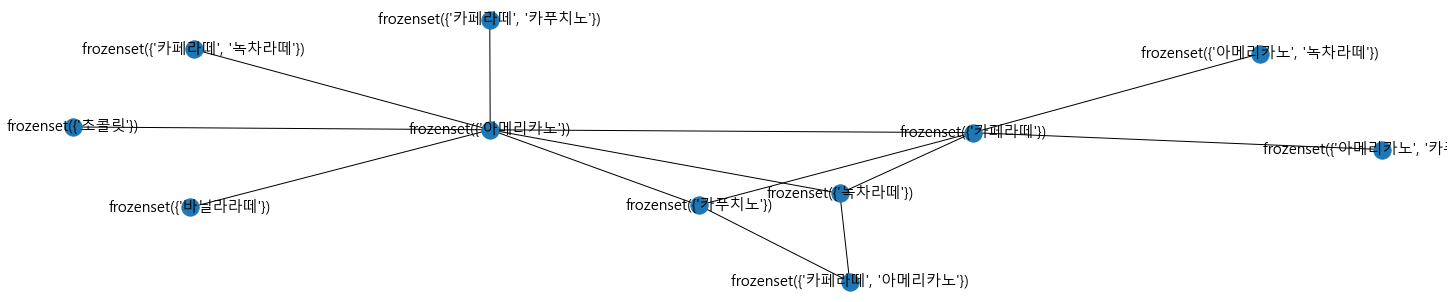

In [6]:
from matplotlib import font_manager, rc
import networkx as nx
import matplotlib.pyplot as plt

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

ga=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)